# Import libraries

The `brisk` library is a custom-made Python library for the import, analysis and visualization of data from the BRISK project.
It comprises scripts and modules for managing data. All the main functions will be compiled in a script in order to be able to use all the functions outside the Python environment

A guide for the installation and the setup of the database, together with the list of scripts will be provided when the whole analysis is set up.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import brisk.visualization.plots_imu as imu
from brisk.utils import path
from brisk.analysis import segmentation

warnings.filterwarnings('ignore')

# List all the subjects

In the `brisk` library, a series of functions for the description of the database (number of subjects, number of trials) is provided.

In [58]:
subjects = path.get_subjects()
print(subjects)

subject = 'simone'
update_subject = False
trials = path.get_trials(subject)
print(trials)

['giovanni', 'luca', 'micheal', 'simone']
['full', 'full_robot', 'half_robot', 'half_robot_touch']


# Visualize IMU data for one subject

Functions are provided also for the visualization of raw data (after a 5Hz LP filter)

<span style="color: red; font-weight: bold">Note</span> AP, ML and VT directions are defined during the neutral pose (arms parallel to the ground)

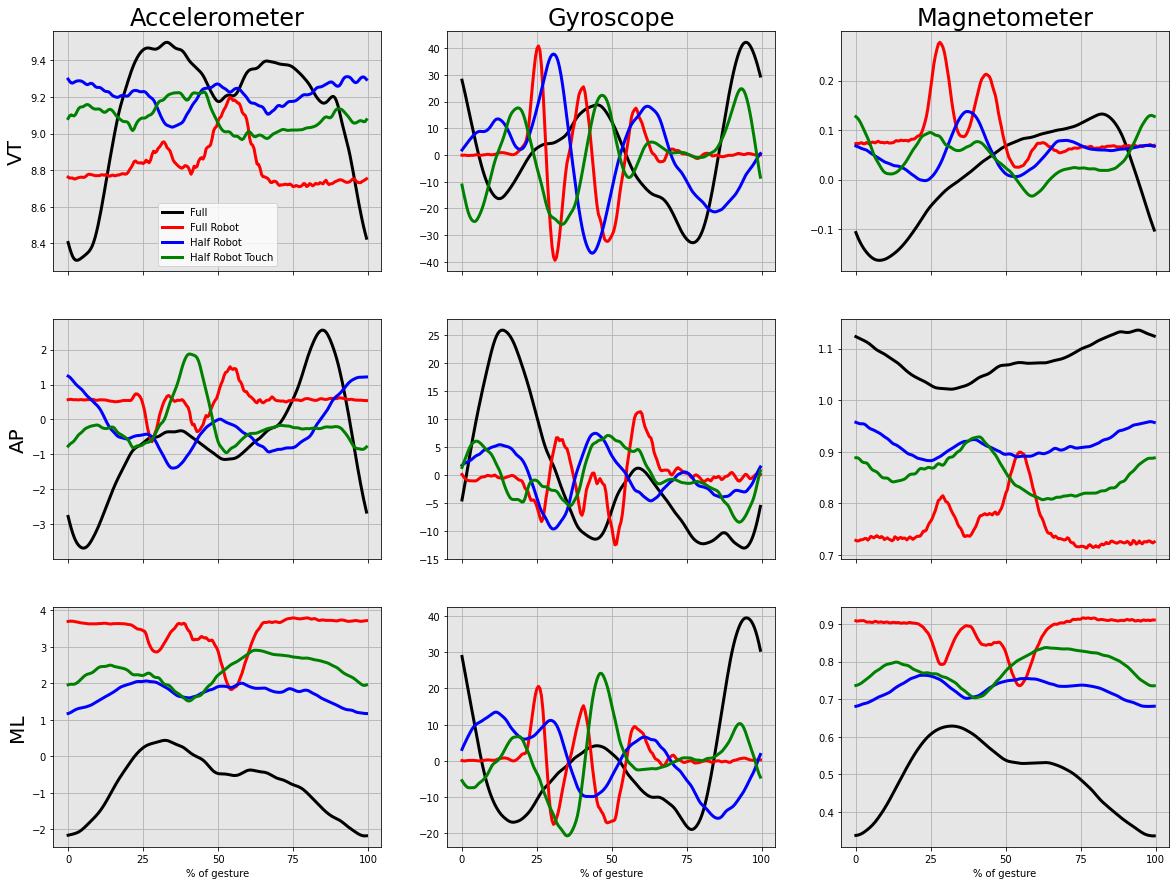

In [59]:
segment = 'trunk'
imu.plot_all_trials(subject, 'trunk')

# Get gesture frequency

All the quantitative analyses on the data will be hard-coded in the library, to ensure repeatability. Here, an example of the analysis of the speed of gestures, in terms of packages per minute

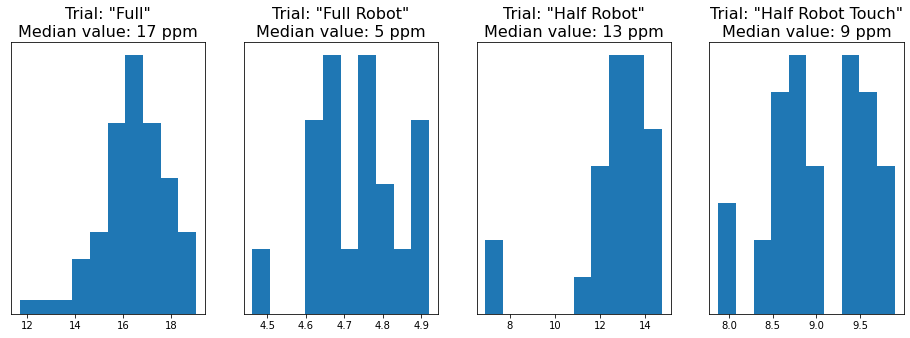

In [60]:
frequencies = segmentation.get_frequencies(subject)

fig, ax = plt.subplots(1,4,figsize=(16,5))
for i, k in enumerate(frequencies.keys()):
    ax[i].hist(frequencies[k])
    ax[i].set_title(
        f'Trial: \"{k.replace("_"," ").title()}\"\nMedian value: {np.median(frequencies[k]):.0f} ppm',
        fontsize=16
    )
    ax[i].set_yticks([])

# Time parameters

Frequencies and durations are selected as time-related global parameters

In [61]:
from brisk.analysis import parameters

tp = parameters.get_time_parameters(subject)
for k,v in tp.items():
    print(f'Trial {k.replace("_"," ").title()}, {v["all_frequency"].size} trials after outliers removal')
    print(f'\tAverage frequency: {v["avg_frequency"]:.0f} PPM')
    print(f'\tAverage duration: {v["avg_duration"]:.2f} s')
    print(f'\tVariability of duration: {v["std_duration"]:.2f} s')
    print()

Trial Full, 68 trials after outliers removal
	Average frequency: 17 PPM
	Average duration: 3.62 s
	Variability of duration: 0.30 s

Trial Full Robot, 17 trials after outliers removal
	Average frequency: 5 PPM
	Average duration: 12.65 s
	Variability of duration: 0.38 s

Trial Half Robot, 46 trials after outliers removal
	Average frequency: 13 PPM
	Average duration: 4.57 s
	Variability of duration: 0.47 s

Trial Half Robot Touch, 35 trials after outliers removal
	Average frequency: 9 PPM
	Average duration: 6.65 s
	Variability of duration: 0.54 s



# Extraction of the cycle based parameters

The cycle based parameters are:

- RMS value during the event (after removing mean value)
- Smoothness during the event (after removing mean value), described via the negative log-dimensionless jerk (i.e. more negative, less smooth)
- Value range during the event

All the parameters have been calculated on the 3 spatial component and on the global (total) value, of both accelerometer and gyroscope data

In [62]:
param = parameters.cycle_parameters(subject, update=update_subject)

Loading saved cycle parameters...


# Extraction of the global parameters

In addition to the average value of the cycle parameters, regularity (i.e. value of the first peak of the autocorrelation) has been used as a parameter

In [63]:
pp = parameters.global_parameters(subject, update=update_subject)

Loading saved global parameters...


# Plots

## Accelerometer

### Trunk

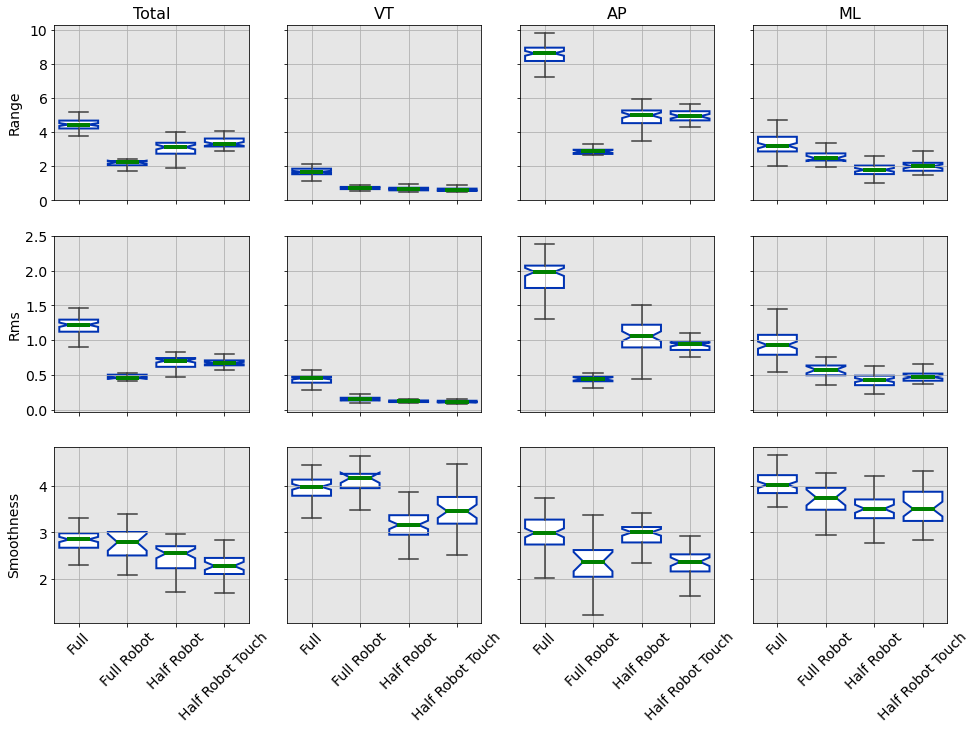

In [64]:
imu.plot_parameters(param, 'trunk', 'acc')

### Arm

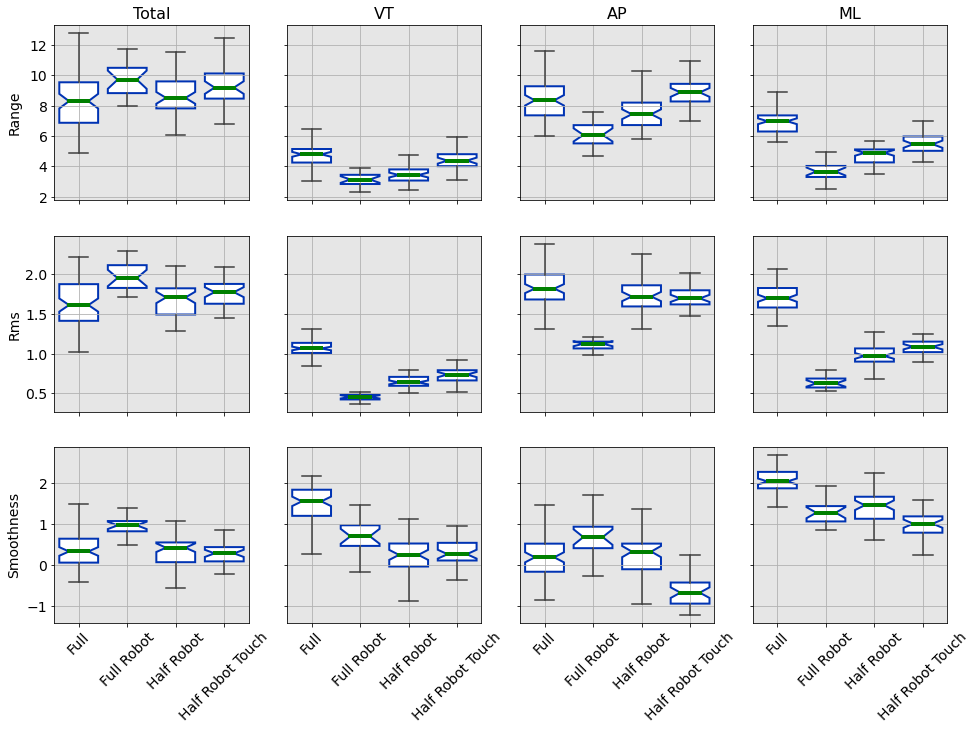

In [65]:
imu.plot_parameters(param, 'arm', 'acc')

### Forearm

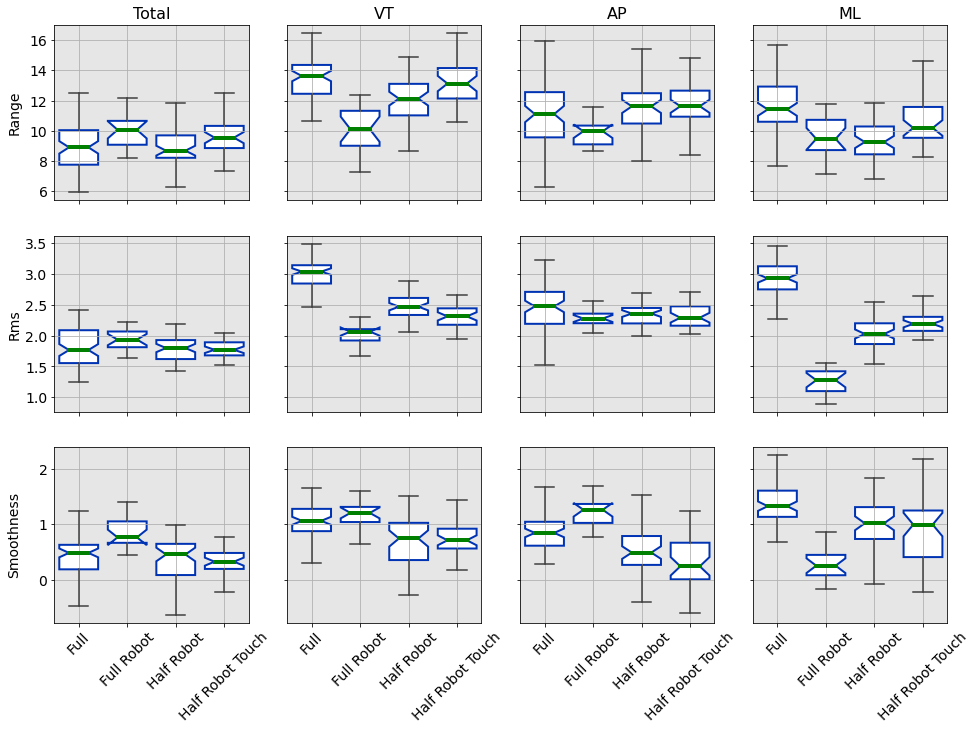

In [66]:
imu.plot_parameters(param, 'forearm', 'acc')

## Gyroscope

### Trunk

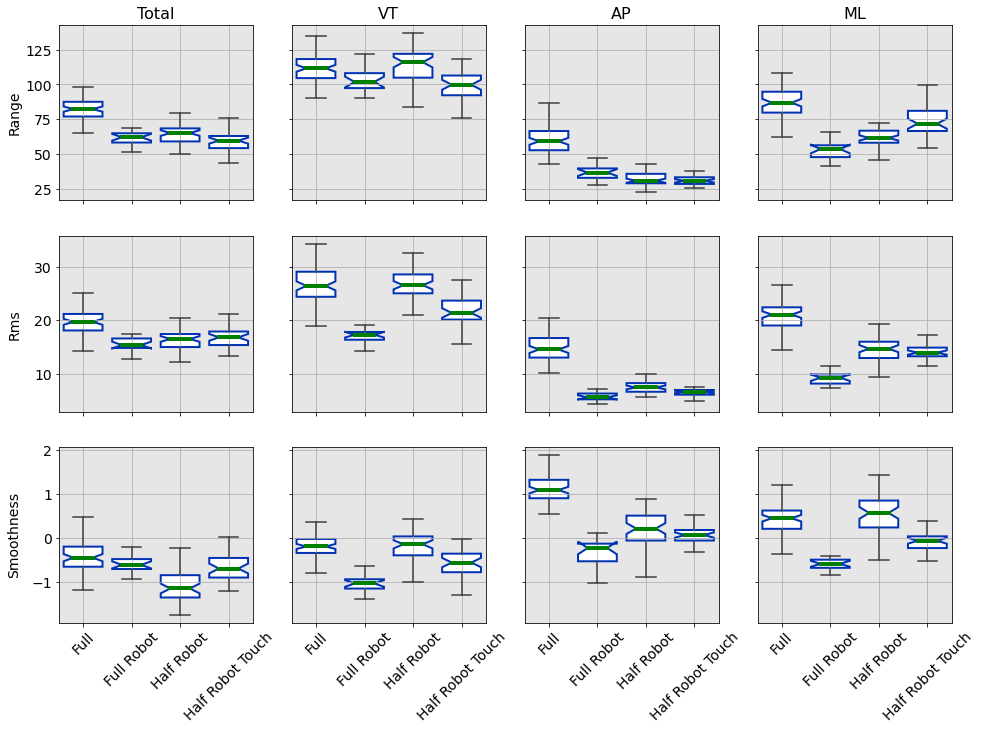

In [67]:
imu.plot_parameters(param, 'trunk', 'gyr')

### Arm

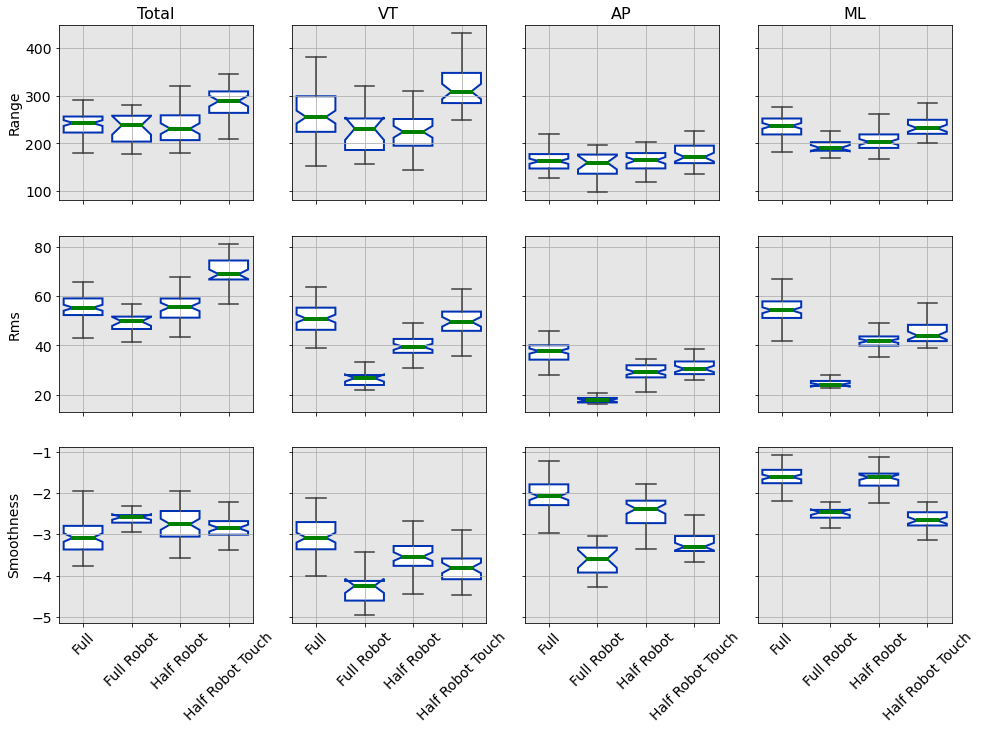

In [68]:
imu.plot_parameters(param, 'arm', 'gyr')

### Forearm

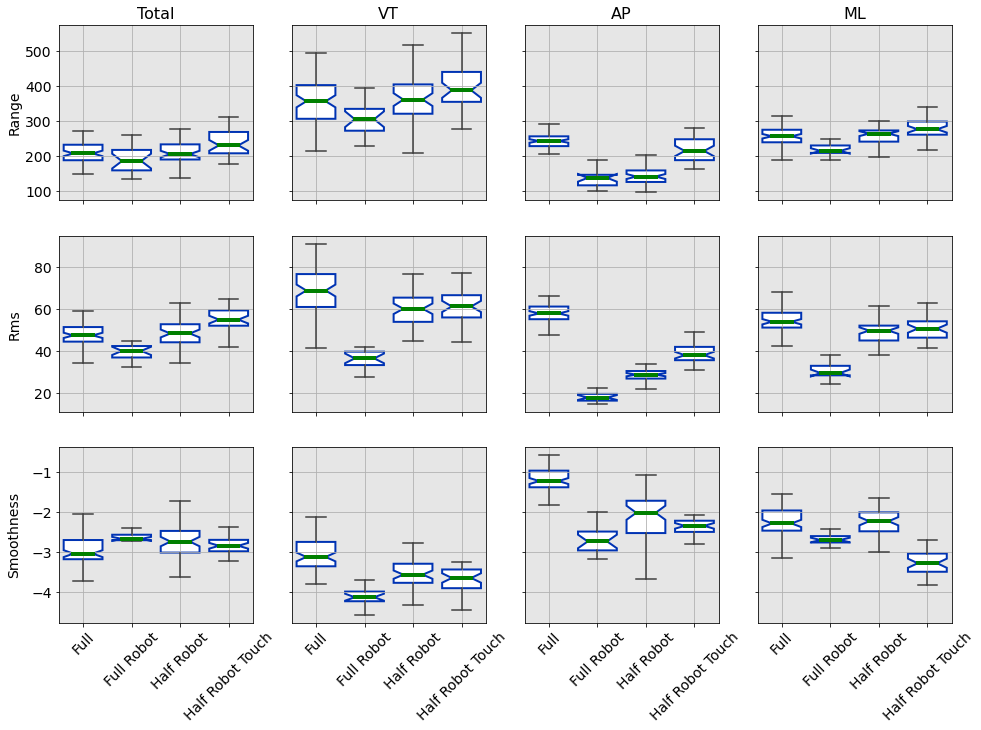

In [69]:
imu.plot_parameters(param, 'forearm', 'gyr')

# Global parameters

Here all the global parameters (number of events, median values for the cycle-based parameters and regularity) are shown.

In [70]:
pp.sort_values(axis=0,by=['segment','dimension']).set_index(['segment','dimension','trial']).head(pp.shape[0])

Unnamed: 0  smoothness_acc  range_acc  \
segment dimension trial                                                     
arm     global    full                       0        0.325306   8.369718   
                  full_robot                12        0.970518   9.675783   
                  half_robot                24        0.270618   8.636758   
                  half_robot_touch          36        0.266189   9.505401   
        x         full                       1        1.501590   4.813128   
                  full_robot                13        0.737155   3.155068   
                  half_robot                25        0.242149   3.510020   
                  half_robot_touch          37        0.299185   4.458556   
        y         full                       2        0.179262   8.434218   
                  full_robot                14        0.655139   6.249449   
                  half_robot                26        0.212712   7.803606   
                  half_robot_touch          38       -0.624452   8.907018   
        z         full                       3        2.026036   6.893047   
                  full_robot                15        1.292219   3.670669   
                  half_robot                27        1.366676   4.745390   
                  half_robot_touch          39        0.957428   5.498916   
forearm global    full                       4        0.411435   8.925270   
                  full_robot                16        0.838567   9.958767   
                  half_robot                28        0.308263   8.903157   
                  half_robot_touch          40        0.324990   9.681850   
        x         full                       5        1.048569  13.478966   
                  full_robot                17        1.191352  10.065610   
                  half_robot                29        0.688452  12.118883   
                  half_robot_touch          41        0.717991  13.306539   
        y         full                       6        0.847756  11.207007   
                  full_robot                18        1.250292   9.811877   
                  half_robot                30        0.482322  11.497147   
                  half_robot_touch          42        0.302664  11.918868   
        z         full                       7        1.368892  11.700212   
                  full_robot                19        0.240836   9.596759   
                  half_robot                31        0.982690   9.372473   
                  half_robot_touch          43        0.877225  10.501444   
trunk   global    full                       8        2.832461   4.422497   
                  full_robot                20        2.751844   2.180315   
                  half_robot                32        2.483094   2.960642   
                  half_robot_touch          44        2.261693   3.393759   
        x         full                       9        3.906860   1.691630   
                  full_robot                21        4.182014   0.755868   
                  half_robot                33        3.129335   0.669586   
                  half_robot_touch          45        3.499550   0.637620   
        y         full                      10        2.991931   8.502806   
                  full_robot                22        2.328018   2.903222   
                  half_robot                34        2.906477   4.747372   
                  half_robot_touch          46        2.348529   4.991001   
        z         full                      11        4.054723   3.266650   
                  full_robot                23        3.739232   2.539242   
                  half_robot                35        3.512675   1.790126   
                  half_robot_touch          47        3.542197   2.046057   

                                     rms_acc  smoothness_gyr   range_gyr  \
segment dimension trial                                                    
arm     global    full           